In [654]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1=finesse.kat()
kat.verbose=True

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-10-14 14:36:37.566035


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 2.63161 seconds

--- Output info ---

Run date and time: 2022-10-14 14:36:37.567155
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.351978742630760e-11 max = 2.058849045458580e-11
QPDrefl1 : min = -8.233549372499070e-13 max = 2.960052808820670e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.336834311167900e-12
circ     : min = 3.254055943519360e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519360e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


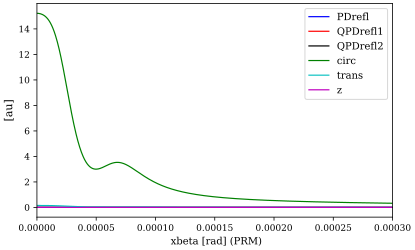

In [655]:
kat4 = finesse.kat()
kat4.verbose=True
kat4.parse("""

maxtem 3  
mod EOM 55.5556M 0.001 3 pm nin n0                #modulator
l laser 30 0 nin                                   # input laser                  
              

s s0 0 n0 n1

##### PRC ######
m PRM 0.759 0.01 90 n4 n5               
s scavity 1.350 n5 n6                   
m ITM 0.98997 0.01 0 n6 n7               
s s2 0.1 n3 n8  
################


##### QPDS ######
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3           #bs to split power between detectors and main cavity  ##Setup-> http://www.gwoptics.org/finesse/examples/autoalignment.php ##
s s1 0.1 n2 n4                    
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump            #bs to split power between two detectors 

s sQPD1 0.1 n9 n11                   
s sQPD2 0.1 n10 n12  

attr s2 g 10                                   #guoy phase for det1
attr sQPD1 g 40                                 #guoy phase for det1
attr sQPD2 g 130                                #guoy phase for det2
##### QPDS ######


cav cavity PRM n5 ITM n6 
trace 2                  

###### attr ##########
attr PRM Rc -23.6                
attr ITM xbeta 0  
attr PRM xbeta 0         
#####################

#### PDs############
pd1 PDrefl 166.6668M 0 n4                           # refl
pd1 QPDrefl1 166.6668M 90 n11                       #Split detector1 refl
pdtype QPDrefl1 x-split   
pd1 QPDrefl2 166.6668M 90 n12                       #Split detector2 refl
pdtype QPDrefl2 x-split   

pd circ n5                                      #circ power#
pd trans n7
##################


                                                ### cavity lock ###
set err PDrefl re    
lock z $err 3000 1n 
put PRM phi $z       
noplot z  


xaxis PRM xbeta lin 0 0.3m 800 
""")
out3 = kat4.run()
out3.info()
out3.plot()


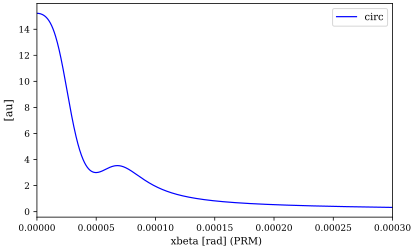

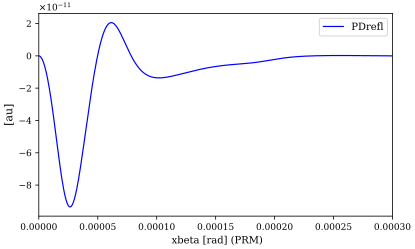

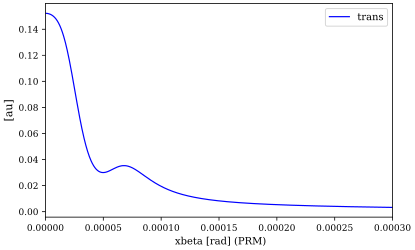

In [656]:
out3.plot(['circ'])
out3.plot(['PDrefl'])
out3.plot(['trans'])

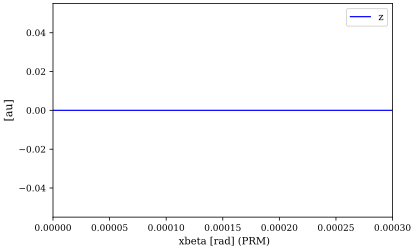

In [657]:
out3.plot(['z'])

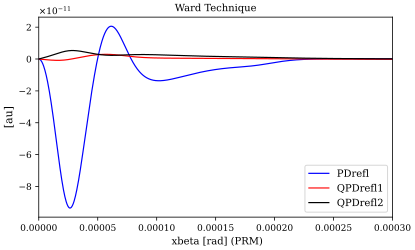

In [658]:
out3.plot(['QPDrefl1','QPDrefl2','PDrefl'],title='Ward Technique')